In [1]:
#imports
import numpy as np
import pandas as pd
from tqdm import tqdm
import scipy.signal as signal #signal processing stuff (e.g. filters, hilbert transform, etc.)
import scipy
import struct
import os
#plotting!
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import nelpy.plotting as npl
import nelpy.io.trodes as neltro
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
#nelpy!
import nelpy as nel
import nelpy.plotting as npl
#make the svg
import svgutils.transform as sg
import sys
from IPython.display import SVG, display, Image
sns.set(rc={'figure.figsize': (12, 4),'lines.linewidth': 1, 'font.size': 18, 'axes.labelsize': 16, 'axes.titlesize':18, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style('white')
sns.set_color_codes(palette='colorblind')
#plots show up within jupyter for matplotlib
%matplotlib inline 

# Load up data and generate figures!

In [2]:
sigmuhz = np.arange(1.5,6.25,0.25)
detectionLatencyCalc = []
relativeDetectionLatencyCalc =[]
fpRateCalc = []
tpRateCalc = []
# fpPercentCalc = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc.append(np.loadtxt(OPENME))
detectionLatencyCalc = np.asarray(detectionLatencyCalc)
relativeDetectionLatencyCalc = np.asarray(relativeDetectionLatencyCalc)
fpRateCalc = np.asarray(fpRateCalc)
tpRateCalc = np.asarray(tpRateCalc)
# fpPercentCalc = np.asarray(fpPercentCalc)

detectionLatencyCalc2 = []
relativeDetectionLatencyCalc2 = []
fpRateCalc2 = []
tpRateCalc2 = []
# fpPercentCalc2 = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc2.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc2.append(np.loadtxt(OPENME))
detectionLatencyCalc2 = np.asarray(detectionLatencyCalc2)
relativeDetectionLatencyCalc2 = np.asarray(relativeDetectionLatencyCalc2)
fpRateCalc2 = np.asarray(fpRateCalc2)
tpRateCalc2 = np.asarray(tpRateCalc2)
# fpPercentCalc2 = np.asarray(fpPercentCalc2)

detectionLatencyCalc1 = []
relativeDetectionLatencyCalc1 = []
fpRateCalc1 = []
tpRateCalc1 = []
# fpPercentCalc1 = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc1.append(np.loadtxt(OPENME)[0:1000])
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc1.append(np.loadtxt(OPENME)[0:1000])
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc1.append(np.loadtxt(OPENME)[0:1000])
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc1.append(np.loadtxt(OPENME)[0:1000])
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc1.append(np.loadtxt(OPENME))
detectionLatencyCalc1 = np.asarray(detectionLatencyCalc1)
relativeDetectionLatencyCalc1 = np.asarray(relativeDetectionLatencyCalc1)
fpRateCalc1 = np.asarray(fpRateCalc1)
tpRateCalc1 = np.asarray(tpRateCalc1)
# fpPercentCalc1 = np.asarray(fpPercentCalc1)

100%|██████████| 19/19 [00:00<00:00, 58.30it/s]


## Paper

In [3]:
tpRateCalc1 *= 100
relativeDetectionLatencyCalc1 *= 100

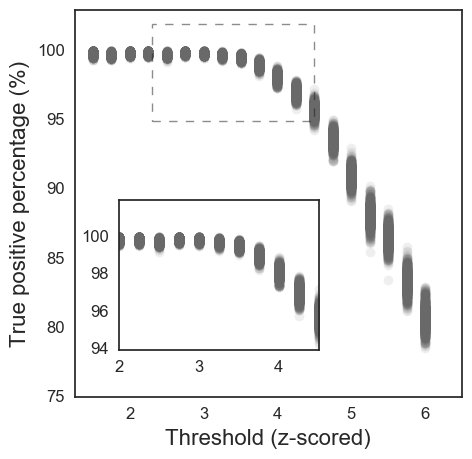

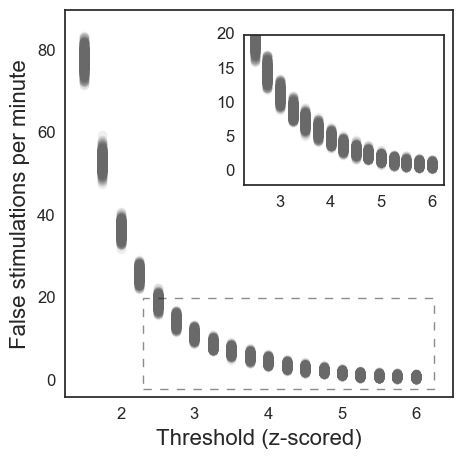

/home/shayok/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.


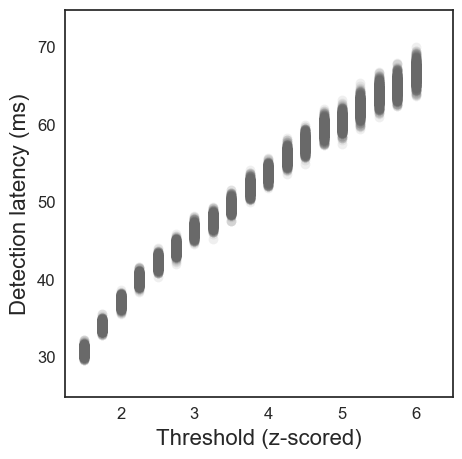

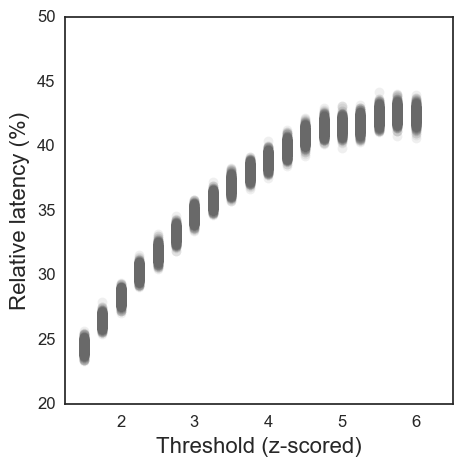

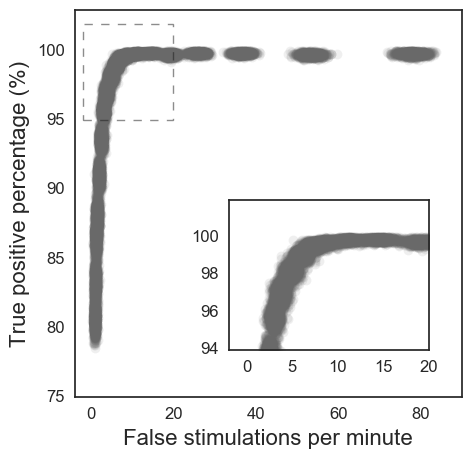

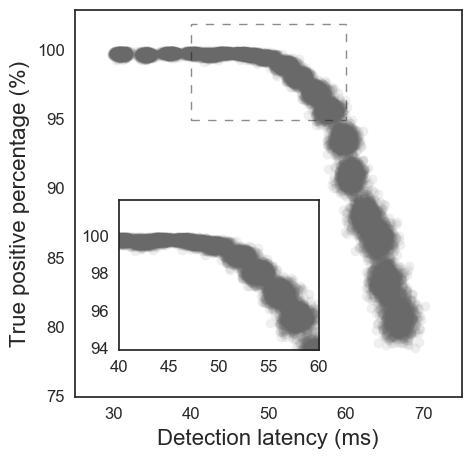

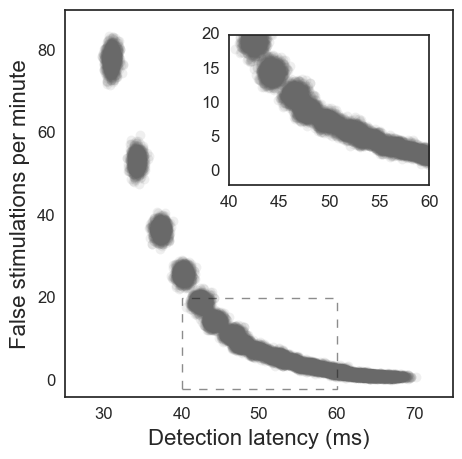

In [39]:
saveFigs = True
sns.set(rc={'figure.figsize': (5, 5),'lines.linewidth': 1, 'font.size': 18, 'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style('white')
sns.set_color_codes(palette='deep')

alfa = 0.1

tpRateLim = [75,103]
thresholdLim = [1.25,6.5]
detectionLatencyLim = [25,75]
fsRateLim = [-4,90]

SINGLECHANNELCOLOR = 'dimgray'


#TP RATE vs THRESHOLD
ax = plt.gca()
for i in range(0,tpRateCalc1.shape[0]):
    plt.scatter(1.5+(np.ones(tpRateCalc1.shape[1])*i*0.25),tpRateCalc1[i][:],alpha=alfa,s=50,c=SINGLECHANNELCOLOR,lw=0)
plt.xlabel("Threshold (z-scored)")
plt.ylabel("True positive percentage (%)")
plt.ylim(tpRateLim)
plt.xlim(thresholdLim)
axins = inset_axes(parent_axes=ax,
                    width=2,
                    height=1.5,
                    loc=5,
                    bbox_to_anchor=(0.68, 0.37), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )
for i in range(0,fpRateCalc1.shape[0]):
    axins.scatter(1.5+(np.ones(tpRateCalc1.shape[1])*i*0.25),tpRateCalc1[i][:],alpha=alfa,s=50,c=SINGLECHANNELCOLOR,lw=0)
axins.set_ylim(95,102)
axins.set_xlim(2.3,4.5)
axins.set_xticks(np.arange(2,4.5,1))
axins.set_yticks(np.arange(94,102,2))
#zoom 
# mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="k", lw=1, ls='--', alpha=0.5)
#rectangle, labels, and stuff
ax.add_patch(
    patches.Rectangle(
        (2.3,95), #(x,y)
        4.5-2.3, #width
        102-95,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)
# plt.legend()
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/tpThresh.svg',transparent=True)
plt.show()

#FALSE STIM RATE vs THRESHOLD
ax = plt.gca()
for i in range(0,fpRateCalc1.shape[0]):
    plt.scatter(1.5+(np.ones(fpRateCalc1.shape[1])*(i)*0.25),fpRateCalc1[i][:],alpha=alfa,s=50,c=SINGLECHANNELCOLOR,lw=0)
plt.xlabel("Threshold (z-scored)")
plt.ylabel("False stimulations per minute")
plt.ylim(fsRateLim)
plt.xlim(thresholdLim)
axins = inset_axes(parent_axes=ax,
                    width=2,
                    height=1.5,
                    loc=5,
                    bbox_to_anchor=(0.95, 0.7), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )
for i in range(0,fpRateCalc1.shape[0]):
    axins.scatter(1.5+(np.ones(fpRateCalc1.shape[1])*(i)*0.25),fpRateCalc1[i][:],alpha=alfa,s=50,c=SINGLECHANNELCOLOR,lw=0)
axins.set_ylim(-2,20)
axins.set_xlim(2.3,6.25)
axins.set_xticks(np.arange(3,6.25,1))
#zoom 
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="k", lw=1, ls='--', alpha=0.5)
#rectangle, labels, and stuff
ax.add_patch(
    patches.Rectangle(
        (2.3,-2), #(x,y)
        6.25-2.3, #width
        20+2,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)
# plt.legend()
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fpThresh.svg',transparent=True)
plt.show()

# #FALSE STIM PERCENTAGE vs THRESHOLD
# for i in range(0,fpPercentCalc1.shape[0]):
#     plt.scatter(1.5+(np.ones(fpPercentCalc1.shape[1])*(i)*0.25),fpPercentCalc1[i][:]*100,alpha=alfa,s=50,c=SINGLECHANNELCOLOR,lw=0)
# plt.xlabel("Threshold (z-scored)")
# plt.ylabel("False stimulations per minute")
# plt.ylim([0,104])
# # plt.xlim([4,6.1])
# plt.legend()
# if saveFigs:
#     plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fpPercentageThresh.svg')
# plt.show()

#DETECTION LATENCY vs THRESHOLD
for i in range(0,detectionLatencyCalc1.shape[0]):
    plt.scatter(1.5+(np.ones(detectionLatencyCalc1.shape[1])*(i)*0.25),detectionLatencyCalc1[i][:],alpha=alfa,s=50,c=SINGLECHANNELCOLOR,lw=0)
plt.xlabel("Threshold (z-scored)")
plt.ylabel("Detection latency (ms)")
plt.xlim(thresholdLim)
plt.ylim(detectionLatencyLim)
plt.legend(loc='lower right')
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latThresh.svg',transparent=True)
plt.show()

#RELATIVE DETECTION LATENCY vs THRESHOLD
for i in range(0,relativeDetectionLatencyCalc1.shape[0]):
    plt.scatter(1.5+(np.ones(relativeDetectionLatencyCalc1.shape[1])*(i)*0.25),relativeDetectionLatencyCalc1[i][:],alpha=alfa,s=50,c=SINGLECHANNELCOLOR,lw=0)
plt.xlabel("Threshold (z-scored)")
plt.ylabel("Relative latency (%)")
# plt.ylim([20,60])
plt.xlim(thresholdLim)
plt.legend(loc='lower right')
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/relativeLatThresh.svg',transparent=True)
plt.show()

#TP vs FALSE STIM RATE
ax = plt.gca()
for i in range(0,detectionLatencyCalc1.shape[0]):
    plt.scatter(fpRateCalc1[i][:],tpRateCalc1[i][:],alpha=alfa,s=50,c=SINGLECHANNELCOLOR,lw=0)
plt.xlabel("False stimulations per minute")
plt.ylabel("True positive percentage (%)")
plt.ylim(tpRateLim)
plt.xlim(fsRateLim)
plt.legend(loc='lower right')
axins = inset_axes(parent_axes=ax,
                    width=2,
                    height=1.5,
                    loc=5,
                    bbox_to_anchor=(0.9, 0.37), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )
for i in range(0,fpRateCalc1.shape[0]):
    axins.scatter(fpRateCalc1[i][:],tpRateCalc1[i][:],alpha=alfa,s=50,c=SINGLECHANNELCOLOR,lw=0)
axins.set_ylim(95,102)
axins.set_xlim(-2,20)
# axins.set_xticks(np.arange(2,4.5,1))
axins.set_yticks(np.arange(94,102,2))
#zoom 
# mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="k", lw=1, ls='--', alpha=0.5)
#rectangle, labels, and stuff
ax.add_patch(
    patches.Rectangle(
        (-2,95), #(x,y)
        20+2, #width
        102-95,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/tpFsr.svg',transparent=True)
plt.show()

# #TP vs FALSE STIM PERCENTAGE
# for i in range(0,detectionLatencyCalc1.shape[0]):
#     plt.scatter(fpPercentCalc1[i][:]*100,tpRateCalc1[i][:],alpha=alfa,s=50,c=SINGLECHANNELCOLOR,lw=0)
# plt.xlabel("False stimulations per minute")
# plt.ylabel("True positive percentage (%)")
# plt.ylim([70,104])
# plt.xlim([0,104])
# plt.legend(loc='lower right')
# if saveFigs:
#     plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/tpFsp.svg')
# plt.show()

# TP vs DETECTION LATENCY
ax = plt.gca()
for i in range(0,detectionLatencyCalc1.shape[0]):
    plt.scatter(detectionLatencyCalc1[i][:],tpRateCalc1[i][:],alpha=alfa,s=50,c=SINGLECHANNELCOLOR,lw=0)
plt.xlabel("Detection latency (ms)")
plt.ylabel("True positive percentage (%)")
plt.ylim(tpRateLim)
plt.xlim(detectionLatencyLim)
# plt.xlim([-0.05,0.25])
plt.legend(loc='upper right')
axins = inset_axes(parent_axes=ax,
                    width=2,
                    height=1.5,
                    loc=5,
                    bbox_to_anchor=(0.68, 0.37), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )
for i in range(0,fpRateCalc1.shape[0]):
    axins.scatter(detectionLatencyCalc1[i][:],tpRateCalc1[i][:],alpha=alfa,s=50,c=SINGLECHANNELCOLOR,lw=0)
axins.set_ylim(95,102)
axins.set_xlim(40,60)
# axins.set_xticks(np.arange(2,4.5,1))
axins.set_yticks(np.arange(94,102,2))
#zoom 
# mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="k", lw=1, ls='--', alpha=0.5)
#rectangle, labels, and stuff
ax.add_patch(
    patches.Rectangle(
        (40,95), #(x,y)
        60-40, #width
        102-95,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latTP.svg',transparent=True)
plt.show()

# FP STIM RATE vs DETECTION LATENCY
ax = plt.gca()
for i in range(0,detectionLatencyCalc1.shape[0]):
    plt.scatter(detectionLatencyCalc1[i][:],fpRateCalc1[i][:],alpha=alfa,s=50,c=SINGLECHANNELCOLOR,lw=0)
plt.xlabel("Detection latency (ms)")
plt.ylabel("False stimulations per minute")
plt.ylim(fsRateLim)
plt.xlim(detectionLatencyLim)
# plt.legend(loc='upper right')
axins = inset_axes(parent_axes=ax,
                    width=2,
                    height=1.5,
                    loc=5,
                    bbox_to_anchor=(0.92, 0.7), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )
for i in range(0,fpRateCalc1.shape[0]):
    axins.scatter(detectionLatencyCalc1[i][:],fpRateCalc1[i][:],alpha=alfa,s=50,c=SINGLECHANNELCOLOR,lw=0)
axins.set_ylim(-2,20)
axins.set_xlim(40,60)
# axins.set_xticks(np.arange(3,6.25,1))
#zoom 
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="k", lw=1, ls='--', alpha=0.5)
#rectangle, labels, and stuff
ax.add_patch(
    patches.Rectangle(
        (40,-2), #(x,y)
        60-40, #width
        20+2,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latFPStim.svg',transparent=True)
plt.show()

# #DETECTION LATENCY vs FP STIM PERCENTAGE
# for i in range(0,detectionLatencyCalc1.shape[0]):
#     plt.scatter(detectionLatencyCalc1[i][:],fpPercentCalc1[i][:]*100,alpha=alfa,s=50,c=SINGLECHANNELCOLOR,lw=0)
# plt.xlabel("Detection latency (ms)")
# plt.ylabel("False stimulations per minute")
# plt.ylim([0,104])
# # plt.xlim([-0.05,0.25])
# plt.legend(loc='upper right')
# if saveFigs:
#     plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latFPPercent.svg')
# plt.show()

# Final Figure!

In [40]:
#create new SVG figure
fig = sg.SVGFigure("17in", "9in")

#load matplotlib-generated figures
tpThresh = sg.fromfile("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/tpThresh.svg")
fsrThresh = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fpThresh.svg')
relDetThresh = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/relativeLatThresh.svg')
latThresh = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latThresh.svg')
tpLat = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latTP.svg')
fsrLat = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latFPStim.svg')
tpFsr = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/tpFsr.svg')

#get the plot objects
##Top Panel
tpThreshPlot1 = tpThresh.getroot()
fsrThreshPlot2 = fsrThresh.getroot()
relDetThreshPlot4 = relDetThresh.getroot()
latThreshPlot3 = latThresh.getroot()
tpThreshPlot1.moveto(10, 30, scale=1)
fsrThreshPlot2.moveto(400, 30, scale=1)
latThreshPlot3.moveto(400+390, 30, scale=1)
relDetThreshPlot4.moveto(400+390+390, 30, scale=1)
##Bottom Panel
tpLatPlot1 = tpLat.getroot()
fsrLatPlot2 = fsrLat.getroot()
tpFsrPlot3 = tpFsr.getroot()
tpLatPlot1.moveto(10, 425, scale=1)
fsrLatPlot2.moveto(400, 425, scale=1)
tpFsrPlot3.moveto(400+390, 425, scale=1)


#add text labels
##Top :Panel
txt1 = sg.TextElement(5,25, "A", size=20, weight="bold")
txt2 = sg.TextElement(395,25, "B", size=20, weight="bold")
txt3 = sg.TextElement(395+390,25,"C", size=20, weight='bold')
txt4 = sg.TextElement(395+390+390,25,"D", size=20, weight='bold')
##Middle :Panel
txt5 = sg.TextElement(5,430, "E", size=20, weight="bold")
txt6 = sg.TextElement(395,430, "F", size=20, weight="bold")
txt7 = sg.TextElement(395+390,430,"G", size=20, weight='bold')


# append plots and labels to figure
fig.append([tpThreshPlot1, fsrThreshPlot2, latThreshPlot3, relDetThreshPlot4, tpLatPlot1, fsrLatPlot2, tpFsrPlot3])
fig.append([txt1, txt2, txt3, txt4, txt5, txt6, txt7,])


fig.save("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.svg")
os.system("inkscape --export-pdf=/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.pdf /home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.svg")
os.system("inkscape --export-png=/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.png /home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.svg")

0

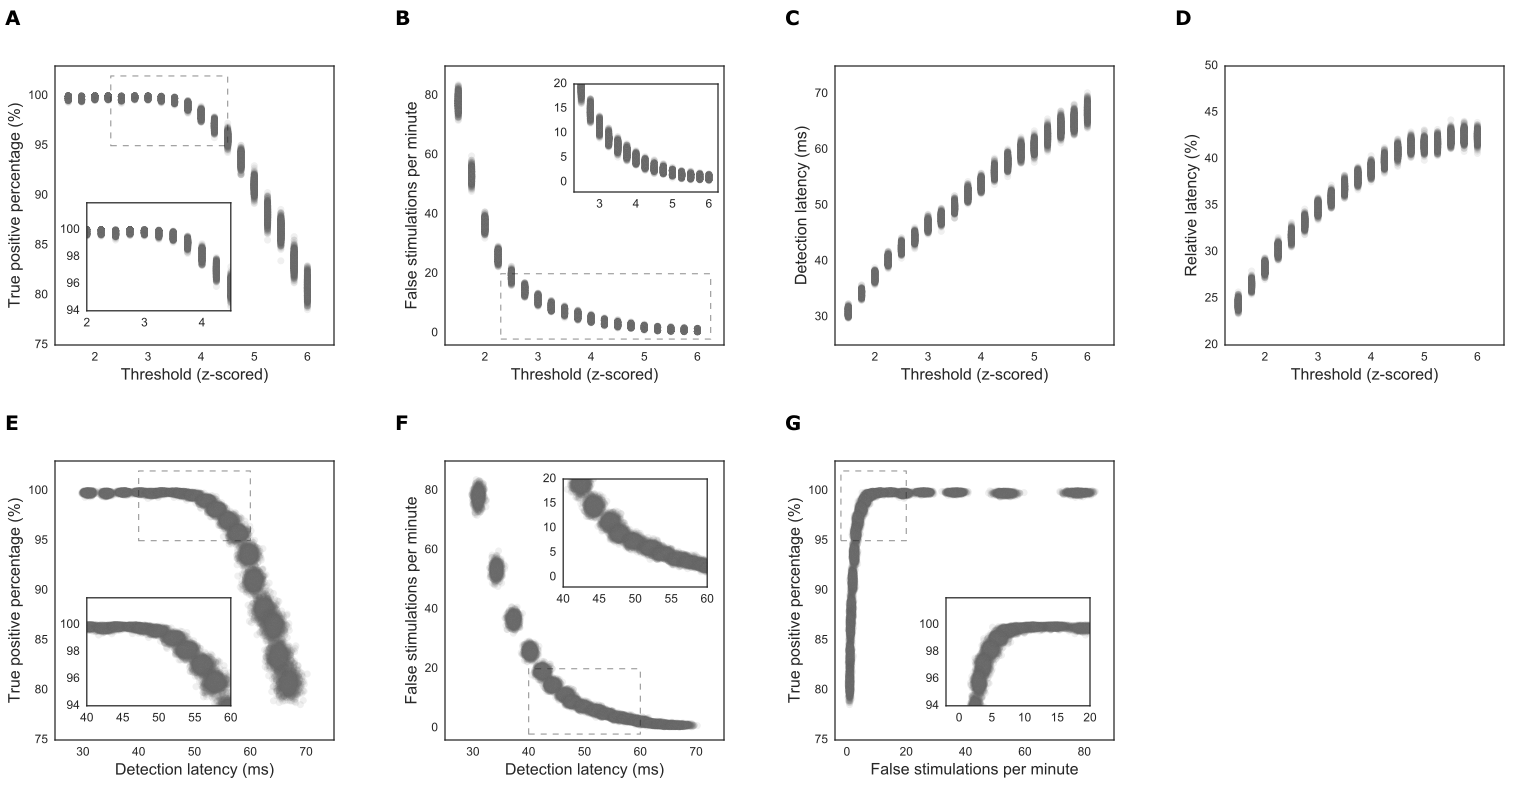

In [41]:
display(Image(filename='/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.png'))